In [1]:
"""
Chapter_1.13.2. Univariate Feature Selection
参考
http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

In [2]:
# #############################################################################
# Import some data to play with
# The iris dataset
iris = datasets.load_iris()
# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

print(iris.data.shape)
print(E[0:3,0:5])
print(E.shape)
print(X.shape)
print(y)
print(y.shape)

(150, 4)
[[ 0.03141083  0.03766655  0.06080236  0.03662665  0.00325699]
 [ 0.08691259  0.00728307  0.04303778  0.08308623  0.06463252]
 [ 0.06751997  0.08266193  0.04997648  0.08202424  0.01963905]]
(150, 20)
(150, 24)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [3]:
plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

print(X_indices.shape)

(24,)


In [4]:
# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

print(scores.shape)
print(scores)

(24,)
[  3.40023500e-01   1.75404693e-01   1.00000000e+00   9.31982956e-01
   3.70547655e-04   4.01224943e-04   5.79612716e-04   1.01717762e-02
   5.66445396e-04   6.66346959e-04   6.21521494e-03   1.02526121e-02
   1.09674437e-03   6.98086527e-03   1.80924173e-03   7.12233403e-03
   7.02685626e-03   8.13566235e-03   1.21004961e-02   2.19688283e-03
   3.85649790e-03   4.93886330e-03   3.19619013e-03   3.09032815e-04]


In [5]:
# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

print(svm_weights.shape)
print(svm_weights)

(24,)
[  6.64193130e-02   2.39875926e-01   1.00000000e+00   7.78682150e-01
   1.32828235e-03   4.57241195e-04   1.81100204e-05   6.96969785e-03
   4.71566525e-03   2.85552312e-03   3.44766486e-03   3.55949353e-04
   4.31296535e-03   4.31869539e-04   4.12973936e-03   2.15228125e-03
   2.41504077e-05   3.60841364e-03   1.18060590e-03   1.16632648e-03
   5.74787156e-04   6.90749323e-05   7.65135758e-04   1.42430766e-03]


In [6]:
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

print(svm_weights_selected.shape)
print(svm_weights_selected)

(3,)
[ 0.07565093  1.          0.6996112 ]


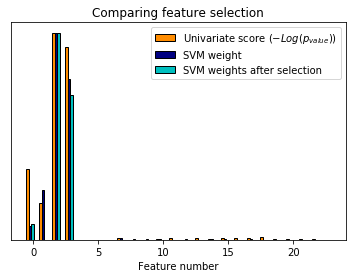

In [7]:
plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')

plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()